# f-AnoGAN for trainig the MNIST dataset

### Step: 0

 Please push "Open in playground" and run below in order.

In [ ]:
# !git clone https://github.com/A03ki/f-AnoGAN.git

Cloning into 'f-AnoGAN'...
remote: Enumerating objects: 191, done.
remote: Counting objects: 100% (191/191), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 191 (delta 106), reused 135 (delta 64), pack-reused 0
Receiving objects: 100% (191/191), 220.51 KiB | 5.96 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [ ]:
# %cd f-AnoGAN

/content/f-AnoGAN


In [ ]:
# !python setup.py install

running install
running bdist_egg
running egg_info
creating fanogan.egg-info
writing fanogan.egg-info/PKG-INFO
writing dependency_links to fanogan.egg-info/dependency_links.txt
writing requirements to fanogan.egg-info/requires.txt
writing top-level names to fanogan.egg-info/top_level.txt
writing manifest file 'fanogan.egg-info/SOURCES.txt'
writing manifest file 'fanogan.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/fanogan
copying fanogan/test_anomaly_detection.py -> build/lib/fanogan
copying fanogan/train_wgangp.py -> build/lib/fanogan
copying fanogan/train_encoder_izif.py -> build/lib/fanogan
copying fanogan/save_compared_images.py -> build/lib/fanogan
copying fanogan/__init__.py -> build/lib/fanogan
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/fanogan
copying build/lib/fanogan/test_anomaly_detection

In [ ]:
# %cd mnist

/content/f-AnoGAN/mnist


### Step: 1

If you don't run command `python train_wgangp.py` yet, please run below.

In [ ]:
# !python train_wgangp.py --training_label 1 --seed 2 --n_epochs 20

9920512it [00:00, 41732419.94it/s]               
Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw
32768it [00:00, 348250.89it/s]
Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw
1654784it [00:00, 8672733.44it/s]              
Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw
8192it [00:00, 143829.59it/s]
Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...
/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.
Done!
[Epoch  0/20] [Batch  0/85] [D loss: 8.159774] [G loss: 0.020820]
[Epoch  0/20] [Batch

The fake images are saved under `f-AnoGAN/mnist/results/images`.

### Step: 2
If you don't run command `train_z_encoding_izif.py` yet, please run below after Step: 1.

In [ ]:
# !python train_encoder_izif.py --training_label 1 --seed 2 --n_epochs 20

[Epoch  0/20] [Batch  0/85] [E loss: 0.269628]
[Epoch  0/20] [Batch  5/85] [E loss: 0.166417]
[Epoch  0/20] [Batch 10/85] [E loss: 0.107070]
[Epoch  0/20] [Batch 15/85] [E loss: 0.100967]
[Epoch  0/20] [Batch 20/85] [E loss: 0.103612]
[Epoch  0/20] [Batch 25/85] [E loss: 0.089559]
[Epoch  0/20] [Batch 30/85] [E loss: 0.085357]
[Epoch  0/20] [Batch 35/85] [E loss: 0.082311]
[Epoch  0/20] [Batch 40/85] [E loss: 0.090374]
[Epoch  0/20] [Batch 45/85] [E loss: 0.125707]
[Epoch  0/20] [Batch 50/85] [E loss: 0.089562]
[Epoch  0/20] [Batch 55/85] [E loss: 0.089873]
[Epoch  0/20] [Batch 60/85] [E loss: 0.072088]
[Epoch  0/20] [Batch 65/85] [E loss: 0.086371]
[Epoch  0/20] [Batch 70/85] [E loss: 0.085062]
[Epoch  0/20] [Batch 75/85] [E loss: 0.068634]
[Epoch  0/20] [Batch 80/85] [E loss: 0.091393]
[Epoch  1/20] [Batch  0/85] [E loss: 0.071241]
[Epoch  1/20] [Batch  5/85] [E loss: 0.095793]
[Epoch  1/20] [Batch 10/85] [E loss: 0.069089]
[Epoch  1/20] [Batch 15/85] [E loss: 0.090486]
[Epoch  1/20]

The reconfigured images are saved under `f-AnoGAN/mnist/results/images_e`.

### Step: 3  
If you don't run command `test_anomaly_detection.py` yet, please run below after Step: 2.

In [ ]:
# !python test_anomaly_detection.py --training_label 1

100% 64607/64607 [02:28<00:00, 436.15it/s]


Scores for anomaly detection are saved under `f-AnoGAN/mnist/results`.

### Step: 4
If you don't run command `save_compared_images.py `yet, please run below after Step: 2.

In [ ]:
# !python save_compared_images.py --seed 4 --n_iters 0 --n_grid_lines 10

Compared images are saved under `f-AnoGAN/mnist/results/images_diff`.

# Visualization

Please run below after Step: 1~3.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [2]:
df = pd.read_csv("mnist/results/score.csv")
df

,label,img_distance,anomaly_score,z_distance
0,1,0.036750,0.045936,0.000856
1,1,0.030134,0.034955,0.000655
2,1,0.034205,0.039028,0.000400
3,1,0.029762,0.033247,0.000493
4,1,0.044860,0.052372,0.000581
...,...,...,...,...
64602,2,0.475988,0.561582,0.019203
64603,3,0.452284,0.551956,0.024223
64604,4,0.339003,0.366336,0.010435
64605,5,0.278357,0.298485,0.007546


In [3]:
trainig_label = 1
labels = np.where(df["label"].values == trainig_label, 0, 1)
anomaly_score = df["anomaly_score"].values
img_distance = df["img_distance"].values
z_distance = df["z_distance"].values

In [15]:
print(anomaly_score.min(), anomaly_score.max(), anomaly_score.mean())
# (0.0120722334831953, 2.1018104553222656, 0.46405111395030696)
#

0.0120722334831953 2.1018104553222656 0.46405111395030696


In [4]:
fpr, tpr, _ = roc_curve(labels, img_distance)
precision, recall, _ = precision_recall_curve(labels, img_distance)
roc_auc = auc(fpr, tpr)
pr_auc =  auc(recall, precision)

## Image-level anomaly detection accuracy evaluation

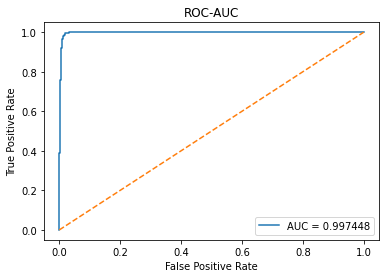

In [5]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

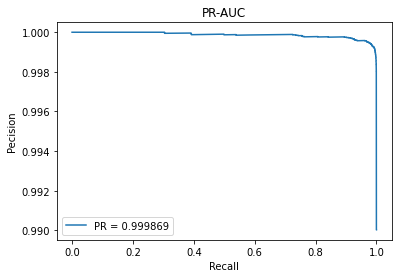

In [6]:
plt.plot(recall, precision, label=f"PR = {pr_auc:3f}")
plt.title("PR-AUC")
plt.xlabel("Recall")
plt.ylabel("Pecision")
plt.legend()
plt.show()

## Discrete distributions of anomaly scores

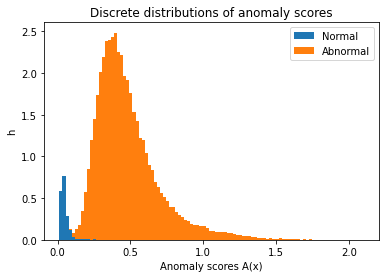

In [7]:
plt.hist([anomaly_score[labels == 0], anomaly_score[labels == 1]],
          bins=100, density=True, stacked=True,
          label=["Normal", "Abnormal"])
plt.title("Discrete distributions of anomaly scores")
plt.xlabel("Anomaly scores A(x)")
plt.ylabel("h")
plt.legend()
plt.show()

## Compared Images

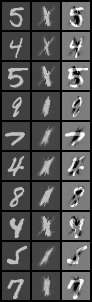

In [12]:
from PIL import Image

Image.open("mnist/results/images_diff/000010.png")